In [1]:
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import mplfinance as mpf
import yfinance as yf
from myTA import downloadAndMakeAnalysis, makeAnalysis, plotAnalysis, Portfolio, Trade, calculateProfit, TradingStrategies

score: $1.740020751953125


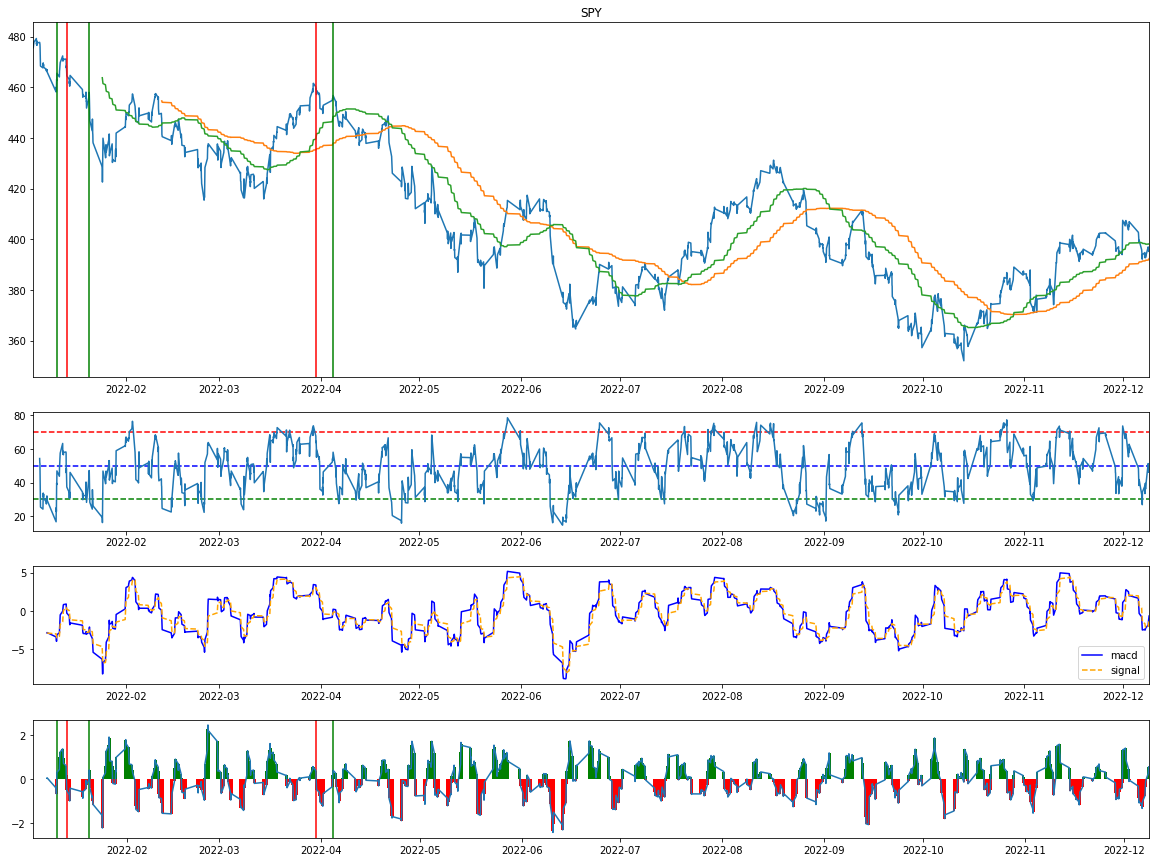

In [6]:
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
interval = '1h'
ticker_code = 'SPY'
data = downloadAndMakeAnalysis(ticker_code, start, end, interval=interval)
tradesList = TradingStrategies.simpleMACD(data)

plotAnalysis(data, ticker_code, tradesList)

print( f"score: ${calculateProfit(tradesList)}")

In [3]:
for i in range(len(data)):
    

IndentationError: expected an indented block (108619319.py, line 2)

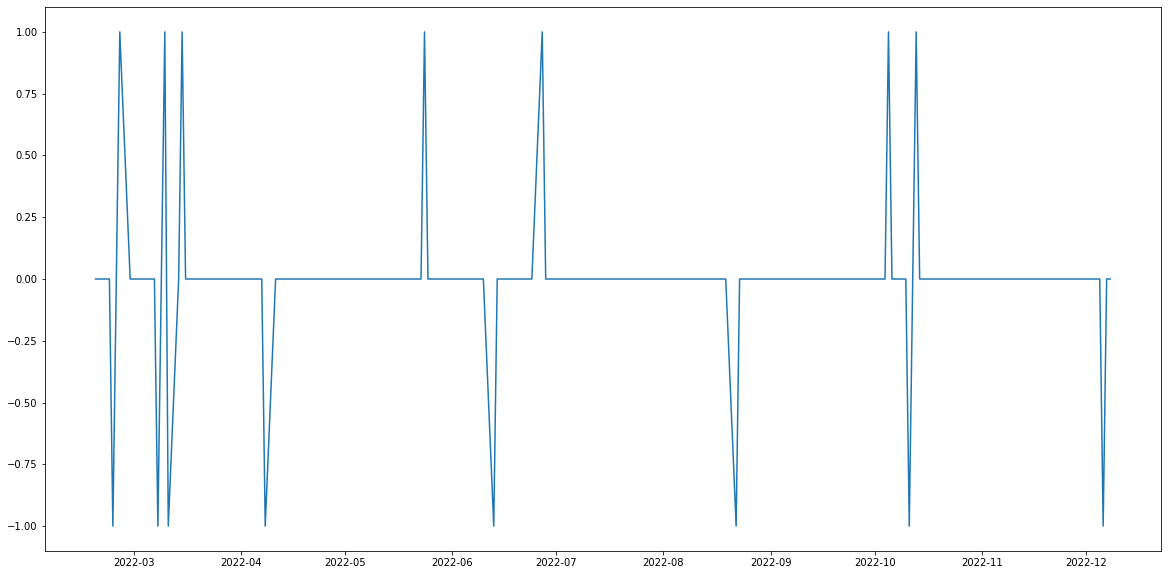

In [ ]:
data.loc[data['macd_hist'] > 0, 'macd_hist_greaterThanZero'] = 1
data.loc[data['macd_hist'] <= 0, 'macd_hist_greaterThanZero'] = 0
data['buySell'] = np.diff(np.concatenate([[0], data['macd_hist_greaterThanZero']]))

tradesList = []
position = 0

for i in range(len(data)):
    if data['buySell'][i] == 1 and position < 1:
        tradesList.append(Trade(data.index[i], "buy", data['High'][i]))
        position += 1
    elif data['buySell'][i] == -1 and position > 0 and tradesList[-1].price < data['Low'][i]:
        tradesList.append(Trade(data.index[i], "sell", data['Low'][i]))
        position -= 1

# 1 buy
# -1 sell
plt.figure(figsize=(20,10))
plt.plot(data.index, data['buySell'])

In [ ]:
calculateProfit(tradesList)

37.530029296875

# TODO
predict macdhist intersection with 0

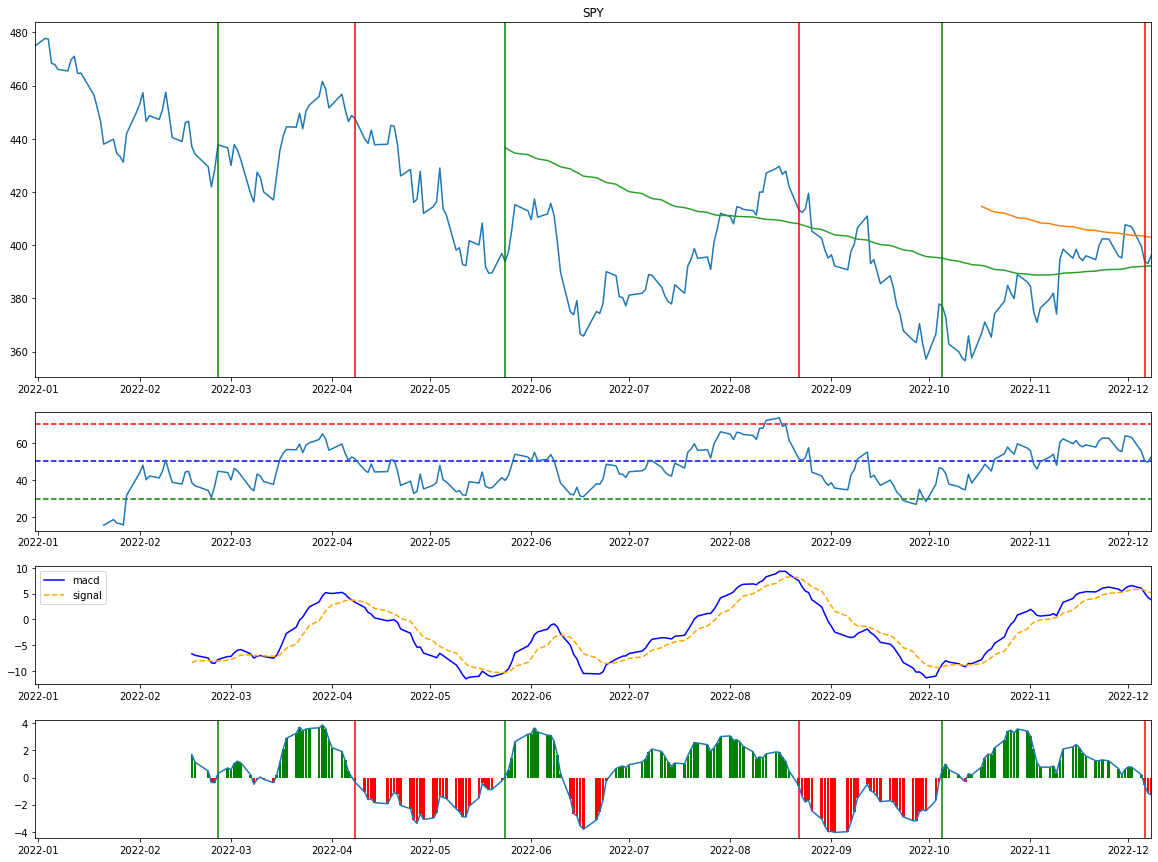

In [ ]:
plotAnalysis(data, ticker_code, tradesList)